In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.duplicated().sum()

1889

In [10]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.groupby('Education')['Age'].mean()

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

In [15]:
df.sort_values(by = 'JoiningYear', ascending = True, inplace = True)

In [16]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
3052,Bachelors,2012,Bangalore,3,34,Male,No,1,0
3054,Bachelors,2012,Bangalore,3,39,Female,No,2,0
3055,Bachelors,2012,Bangalore,3,41,Male,No,3,0
3058,Bachelors,2012,Bangalore,3,33,Male,No,2,0
...,...,...,...,...,...,...,...,...,...
2221,Bachelors,2018,Pune,3,29,Male,Yes,1,1
2529,Masters,2018,New Delhi,3,30,Female,No,4,1
70,Bachelors,2018,Bangalore,3,23,Female,No,1,1
3267,Bachelors,2018,New Delhi,3,35,Female,No,2,1


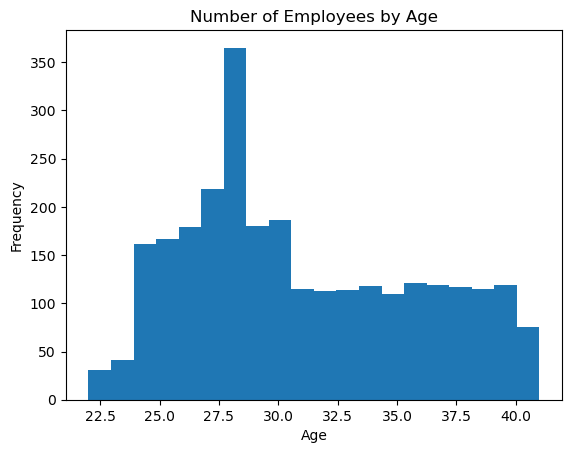

In [18]:
plt.hist(df['Age'], bins = 20)
plt.title('Number of Employees by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

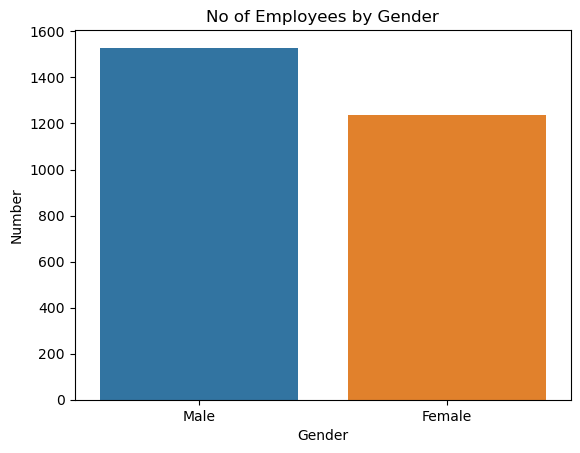

In [19]:
sns.countplot( data = df, x = 'Gender')
plt.title('No of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

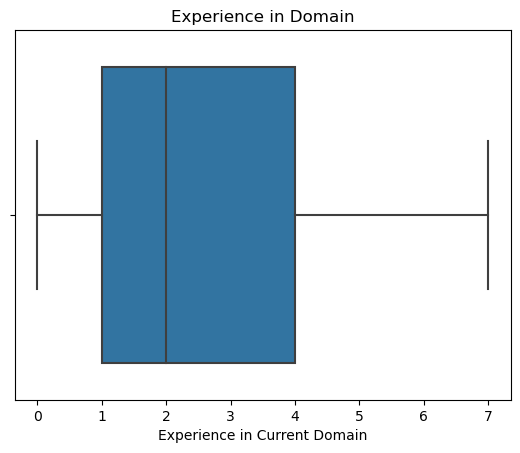

In [20]:
sns.boxplot(data = df, x = 'ExperienceInCurrentDomain')
plt.title('Experience in Domain')
plt.xlabel('Experience in Current Domain')
plt.show()

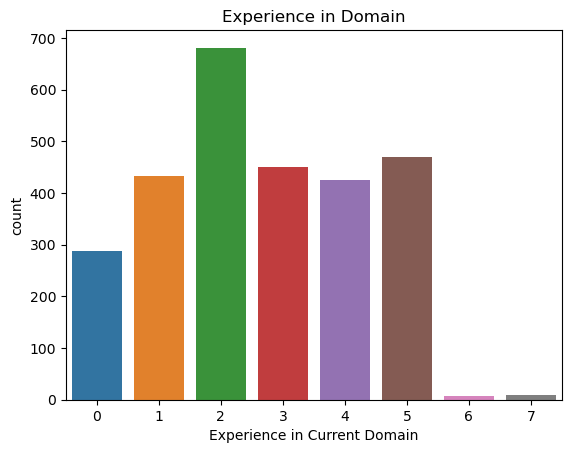

In [21]:
sns.countplot(data = df, x = 'ExperienceInCurrentDomain')
plt.title('Experience in Domain')
plt.xlabel('Experience in Current Domain')
plt.show()

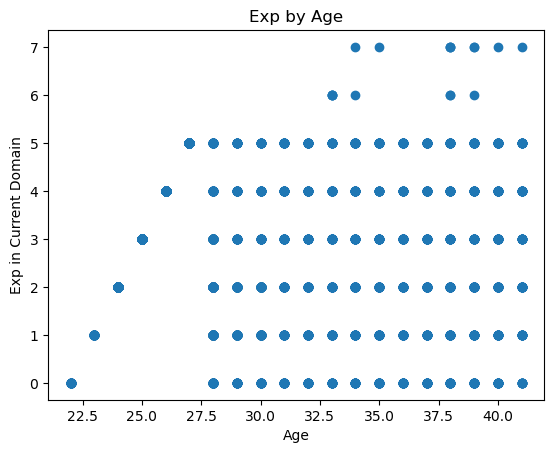

In [22]:
plt.scatter(df['Age'], df['ExperienceInCurrentDomain'])
plt.title('Exp by Age')
plt.xlabel('Age')
plt.ylabel('Exp in Current Domain')
plt.show()

In [23]:
df.groupby('PaymentTier')['LeaveOrNot'].value_counts()

PaymentTier  LeaveOrNot
1            0              141
             1               77
2            1              343
             0              227
3            0             1308
             1              668
Name: LeaveOrNot, dtype: int64

In [24]:
df[df['LeaveOrNot'] == 1]['PaymentTier'].mean()

2.5431985294117645

In [25]:
df.groupby('City')['City'].count()

City
Bangalore    1171
New Delhi     792
Pune          801
Name: City, dtype: int64

In [27]:
benched_percentage = df.groupby('EverBenched')['EverBenched'].count() / len(df) * 100
benched_percentage

EverBenched
No     86.939219
Yes    13.060781
Name: EverBenched, dtype: float64

In [28]:
df.groupby(['Education', 'Gender'])['Age'].mean()

Education  Gender
Bachelors  Female    30.929530
           Male      31.619313
Masters    Female    30.348921
           Male      29.994429
PHD        Female    29.730159
           Male      29.795699
Name: Age, dtype: float64

In [29]:
df.groupby('PaymentTier')['ExperienceInCurrentDomain'].std()

PaymentTier
1    1.657295
2    1.543400
3    1.624992
Name: ExperienceInCurrentDomain, dtype: float64

In [30]:
df.groupby(['JoiningYear', 'Gender'])['Gender'].count()

JoiningYear  Gender
2012         Female    127
             Male      181
2013         Female    175
             Male      221
2014         Female    163
             Male      222
2015         Female    265
             Male      199
2016         Female    123
             Male      187
2017         Female    284
             Male      378
2018         Female     98
             Male      141
Name: Gender, dtype: int64

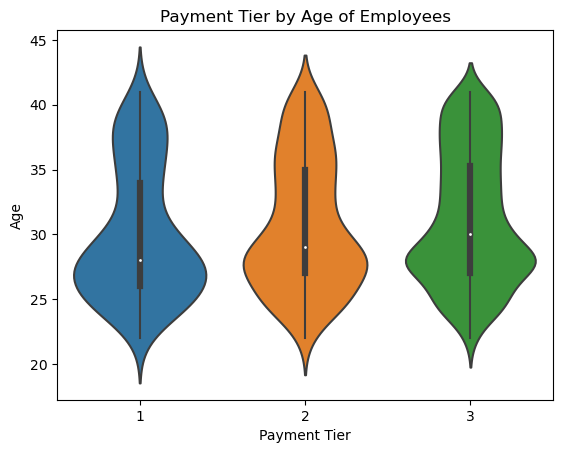

In [31]:
sns.violinplot(data = df, x = 'PaymentTier', y = 'Age')
plt.title('Payment Tier by Age of Employees')
plt.xlabel('Payment Tier')
plt.ylabel('Age')
plt.show()

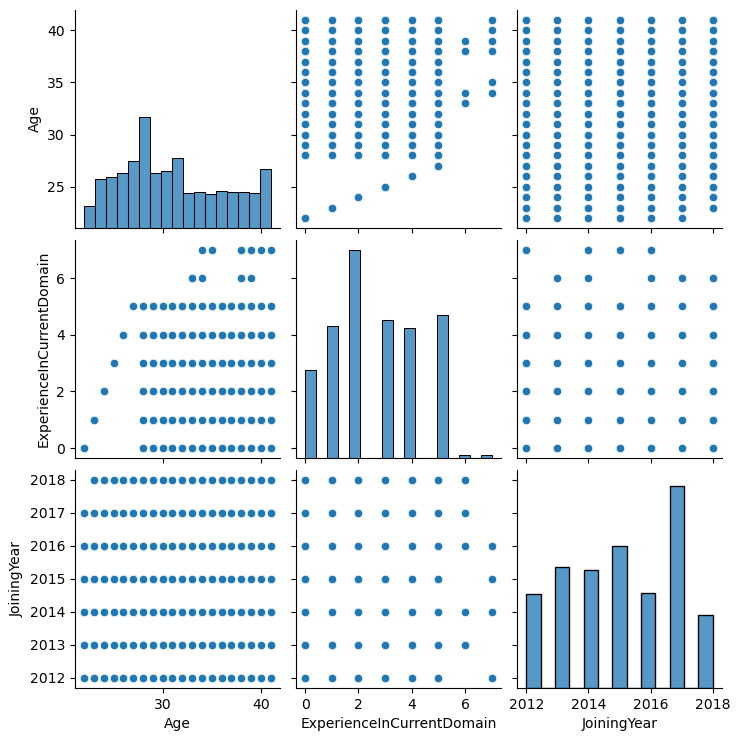

In [32]:
sns.pairplot(df[['Age', 'ExperienceInCurrentDomain', 'JoiningYear']])
plt.show()

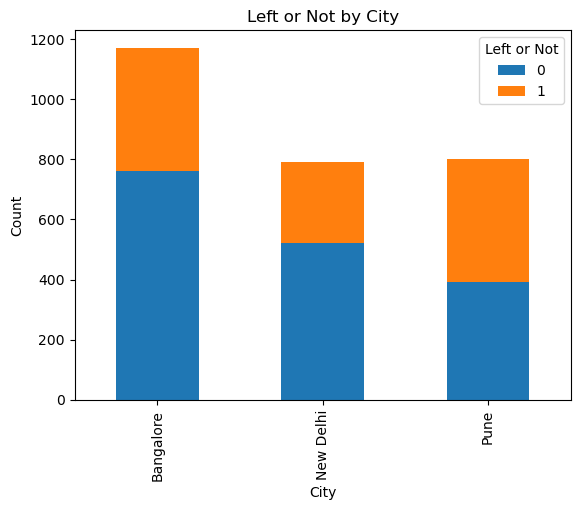

In [34]:
city_leave_counts = df.groupby('City')['LeaveOrNot'].value_counts().unstack()
city_leave_counts.plot(kind = 'bar', stacked = True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Left or Not by City')
plt.legend(title = 'Left or Not')
plt.show()

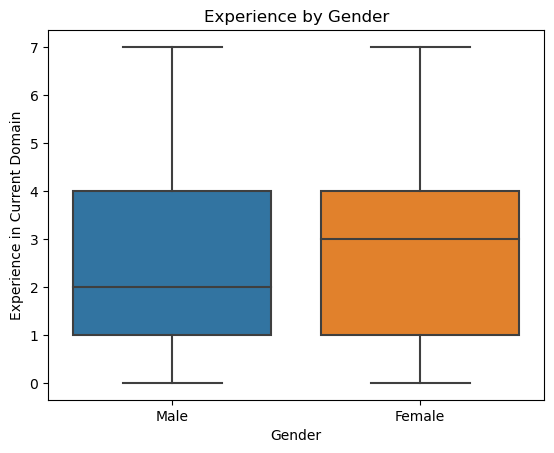

In [35]:
sns.boxplot(data = df, x = 'Gender', y = 'ExperienceInCurrentDomain')
plt.xlabel('Gender')
plt.ylabel('Experience in Current Domain')
plt.title('Experience by Gender')
plt.show()

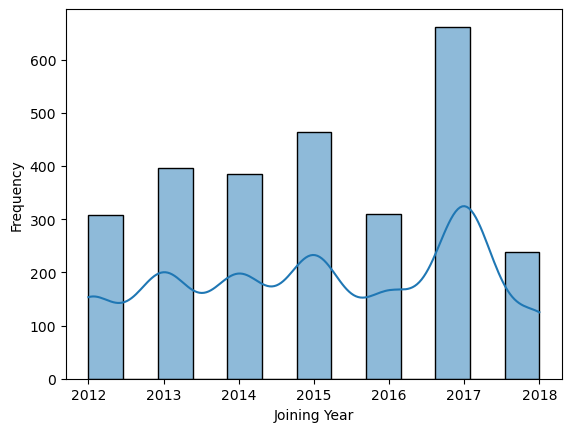

In [36]:
sns.histplot(df['JoiningYear'], kde = True)
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.show()

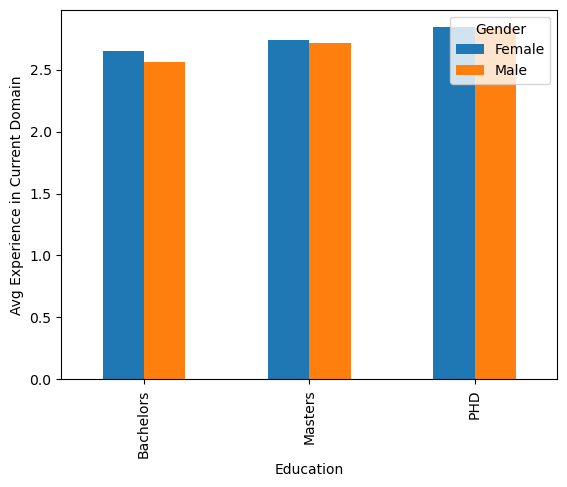

In [37]:
grouped = df.groupby(['Education', 'Gender'])['ExperienceInCurrentDomain'].mean().unstack()

grouped.plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Avg Experience in Current Domain')
plt.show()

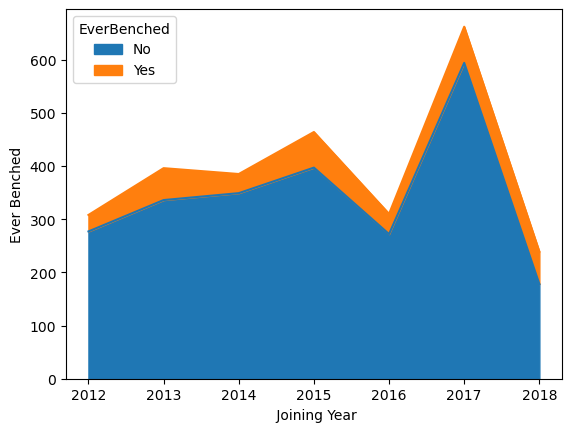

In [38]:
grouped = df.groupby(['JoiningYear', 'EverBenched'])['EverBenched'].count().unstack()
grouped.plot(kind = 'area', stacked = True)
plt.xlabel(' Joining Year')
plt.ylabel('Ever Benched')
plt.show()

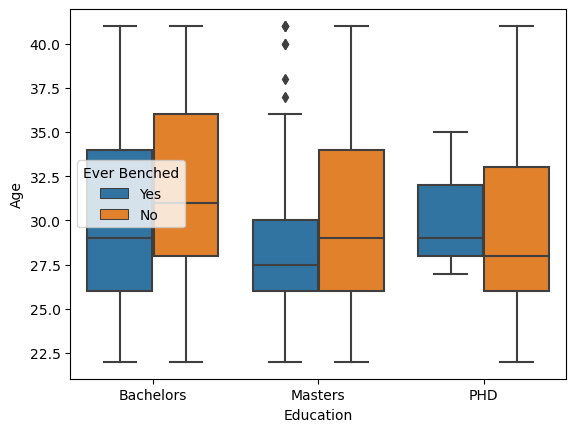

In [39]:
sns.boxplot(data = df, x = 'Education', y = 'Age', hue = 'EverBenched')
plt.xlabel('Education')
plt.ylabel('Age')
plt.legend(title = 'Ever Benched')
plt.show()

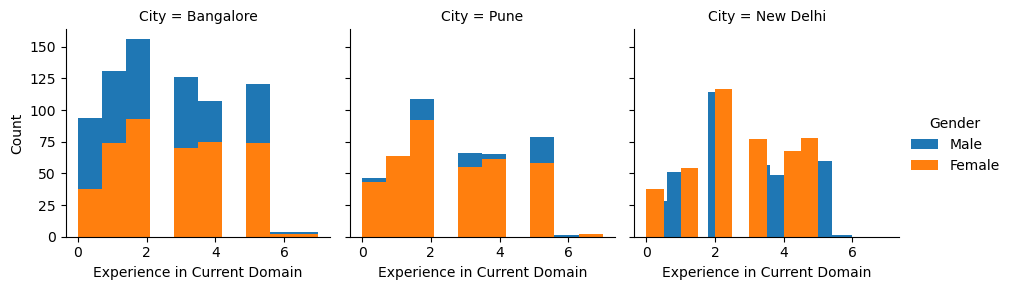

In [40]:
g = sns.FacetGrid(df, col = 'City', hue = 'Gender')
g.map(plt.hist, 'ExperienceInCurrentDomain')
g.set_axis_labels('Experience in Current Domain', 'Count')
g.add_legend(title = 'Gender')
plt.show()

In [41]:
citygroup = df.groupby(['JoiningYear', 'City'])['Age'].mean().unstack()

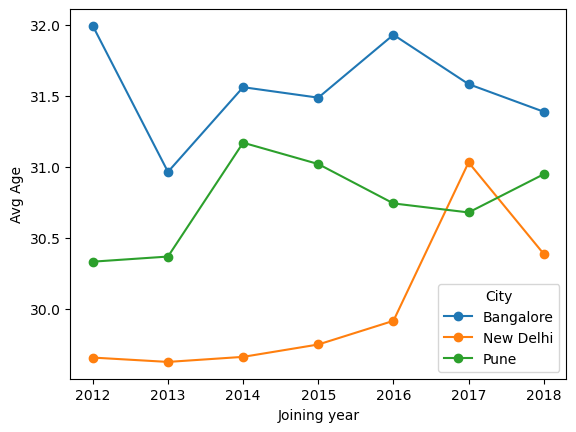

In [42]:
citygroup.plot(kind = 'line', marker = 'o')
plt.xlabel('Joining year')
plt.ylabel('Avg Age')
plt.show()

In [43]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
3052,Bachelors,2012,Bangalore,3,34,Male,No,1,0
3054,Bachelors,2012,Bangalore,3,39,Female,No,2,0
3055,Bachelors,2012,Bangalore,3,41,Male,No,3,0
3058,Bachelors,2012,Bangalore,3,33,Male,No,2,0
...,...,...,...,...,...,...,...,...,...
2221,Bachelors,2018,Pune,3,29,Male,Yes,1,1
2529,Masters,2018,New Delhi,3,30,Female,No,4,1
70,Bachelors,2018,Bangalore,3,23,Female,No,1,1
3267,Bachelors,2018,New Delhi,3,35,Female,No,2,1


In [44]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [46]:
X = df.iloc[:, : -1]

In [51]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2
3052,Bachelors,2012,Bangalore,3,34,Male,No,1
3054,Bachelors,2012,Bangalore,3,39,Female,No,2
3055,Bachelors,2012,Bangalore,3,41,Male,No,3
3058,Bachelors,2012,Bangalore,3,33,Male,No,2
...,...,...,...,...,...,...,...,...
2221,Bachelors,2018,Pune,3,29,Male,Yes,1
2529,Masters,2018,New Delhi,3,30,Female,No,4
70,Bachelors,2018,Bangalore,3,23,Female,No,1
3267,Bachelors,2018,New Delhi,3,35,Female,No,2


In [48]:
Y = df.iloc[:, -1]

In [50]:
Y

4651    0
3052    0
3054    0
3055    0
3058    0
       ..
2221    1
2529    1
70      1
3267    1
3293    1
Name: LeaveOrNot, Length: 2764, dtype: int64

In [52]:
X.drop(columns = ['JoiningYear', 'City', 'Age'], inplace = True)

In [53]:
X

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,Bachelors,3,Male,Yes,2
3052,Bachelors,3,Male,No,1
3054,Bachelors,3,Female,No,2
3055,Bachelors,3,Male,No,3
3058,Bachelors,3,Male,No,2
...,...,...,...,...,...
2221,Bachelors,3,Male,Yes,1
2529,Masters,3,Female,No,4
70,Bachelors,3,Female,No,1
3267,Bachelors,3,Female,No,2


In [54]:
# Transform categorical cokumns to numeric

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [56]:
X['Education'] = labelencoder.fit_transform(X['Education'])
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['EverBenched'] = labelencoder.fit_transform(X['EverBenched'])

In [57]:
X

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4651,0,3,1,1,2
3052,0,3,1,0,1
3054,0,3,0,0,2
3055,0,3,1,0,3
3058,0,3,1,0,2
...,...,...,...,...,...
2221,0,3,1,1,1
2529,1,3,0,0,4
70,0,3,0,0,1
3267,0,3,0,0,2


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [64]:
from sklearn.metrics import accuracy_score

def modelPerformance(predictions):
    print('Accuracy score for the model is: {}'.format(accuracy_score(Y_test, predictions)))

In [65]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, Y_train)

LogisticRegression()

In [66]:
log_preds = log_model.predict(scaled_X_test)

In [67]:
modelPerformance(log_preds)

Accuracy score for the model is: 0.6292947558770343


In [69]:
# K-Neighbors Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [70]:
param_grid = {'n_neighbors' : [3, 5, 7, 9, 11],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_kn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid_kn.fit(scaled_X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [71]:
print('Best Parameters:', grid_kn.best_params_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [72]:
preds_kn = grid_kn.predict(scaled_X_test)
modelPerformance(preds_kn)

Accuracy score for the model is: 0.6835443037974683


In [73]:
# Support Vector Classifier

from sklearn.svm import SVC
svm = SVC()
param_grid_svc = {'C' : [0.01, 0.1, 0.5, 1],
                 'kernel' : ['linear', 'rbf', 'poly']}

In [74]:
grid_svc = GridSearchCV(svm, param_grid_svc, cv = 5)
grid_svc.fit(scaled_X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [75]:
grid_svc.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [76]:
preds_svc = grid_svc.predict(scaled_X_test)
modelPerformance(preds_svc)

Accuracy score for the model is: 0.6690777576853526


In [77]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [None, 10, 20, 30, 40, 50],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv = 5)
grid_search_tree.fit(scaled_X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [78]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [79]:
preds_tree = grid_search_tree.predict(scaled_X_test)
modelPerformance(preds_tree)

Accuracy score for the model is: 0.6817359855334539


In [80]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [81]:
param_grid_rfc = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'bootstrap': bootstrap,
                 'oob_score': oob_score}
grid_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv = 5)
grid_rfc.fit(scaled_X_train, Y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\hp\a

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [82]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 32, 'oob_score': False}

In [83]:
preds_rfc = grid_rfc.predict(scaled_X_test)
modelPerformance(preds_rfc)

Accuracy score for the model is: 0.674502712477396
